In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_set = pd.read_csv("train.csv").set_index("id")
test_set = pd.read_csv("test.csv").set_index("id")

## Data Mining

### Datasets Overview

In [4]:
train_set.head().T

id,0,1,2,3,4
Gender,Male,Female,Female,Female,Male
Age,24.443011,18.0,18.0,20.952737,31.641081
Height,1.699998,1.56,1.71146,1.71073,1.914186
Weight,81.66995,57.0,50.165754,131.274851,93.798055
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.0,2.0,1.880534,3.0,2.679664
NCP,2.983297,3.0,1.411685,3.0,1.971472
CAEC,Sometimes,Frequently,Sometimes,Sometimes,Sometimes
SMOKE,no,no,no,no,no


In [5]:
test_set.head().T

id,20758,20759,20760,20761,20762
Gender,Male,Female,Female,Male,Female
Age,26.899886,21.0,26.0,20.979254,26.0
Height,1.848294,1.6,1.643355,1.553127,1.627396
Weight,120.644178,66.0,111.600553,103.669116,104.835346
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.938616,2.0,3.0,2.0,3.0
NCP,3.0,1.0,3.0,2.977909,3.0
CAEC,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes
SMOKE,no,no,no,no,no


In [23]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             20758

In [24]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13840 entries, 20758 to 34597
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          13840 non-null  object 
 1   Age                             13840 non-null  float64
 2   Height                          13840 non-null  float64
 3   Weight                          13840 non-null  float64
 4   family_history_with_overweight  13840 non-null  object 
 5   FAVC                            13840 non-null  object 
 6   FCVC                            13840 non-null  float64
 7   NCP                             13840 non-null  float64
 8   CAEC                            13840 non-null  object 
 9   SMOKE                           13840 non-null  object 
 10  CH2O                            13840 non-null  float64
 11  SCC                             13840 non-null  object 
 12  FAF                             1

### Data Type

In [25]:
train_set.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [26]:
train_set.describe(include=['object', 'bool'])

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


### Summary

| Features      | Description | Variable | Type |
|--------------|----------|----------|----------|
| id       | Identifier        | Numerical | int |
| Gender      | Gender        | Categorical | object |
| Age      | Age        | Numerical | float |
| Height     | Height     | Numerical | float |
| Weight      | Weight     | Numerical | float |
| family_history_with_overweight   | family member suffered or suffers from overweight        | Categorical | object |
| FAVC      | Frequent consumption of high caloric food     | Categorical | object |
| FCVC      | Frequency of consumption of vegetables     | Numerical | float |
| NCP      | Number of main meals     | Numerical | float |
| CAEC      | Consumption of food between meals     | Categorical | object |
| SMOKE      | Smoker or not     | Categorical | object |
| CH2O      | Consumption of water daily     | Numerical | float|
| SCC      | Calories consumption monitoring     | Categorical | object |
| FAF      | Physical activity frequency     | Numerical | float |
| TUE      | Time using technology devices     | Numerical | float |
| CALC      | Consumption of alcohol     | Categorical | object |
| MTRANS      | Transportation used     | Categorical | object |
| NObeyesdad      | Obesity level deducted     | Categorical | object |

### Missing Values

In [17]:
print('There are {} missing values in the train set'.format(train_set.isnull().sum().sum()))
print('There are {} missing values in the test set'.format(test_set.isnull().sum().sum()))

There are 0 missing values in the train set
There are 0 missing values in the test set


### Duplicated Rows

In [15]:
print('There are {} duplicate rows in the train set'.format((train_set.duplicated() == True).sum()))
print('There are {} duplicate rows in the test set'.format((test_set.duplicated() == True).sum()))

There are 0 duplicate rows in the train set
There are 0 duplicate rows in the test set


### Distribution of the Numerical Features

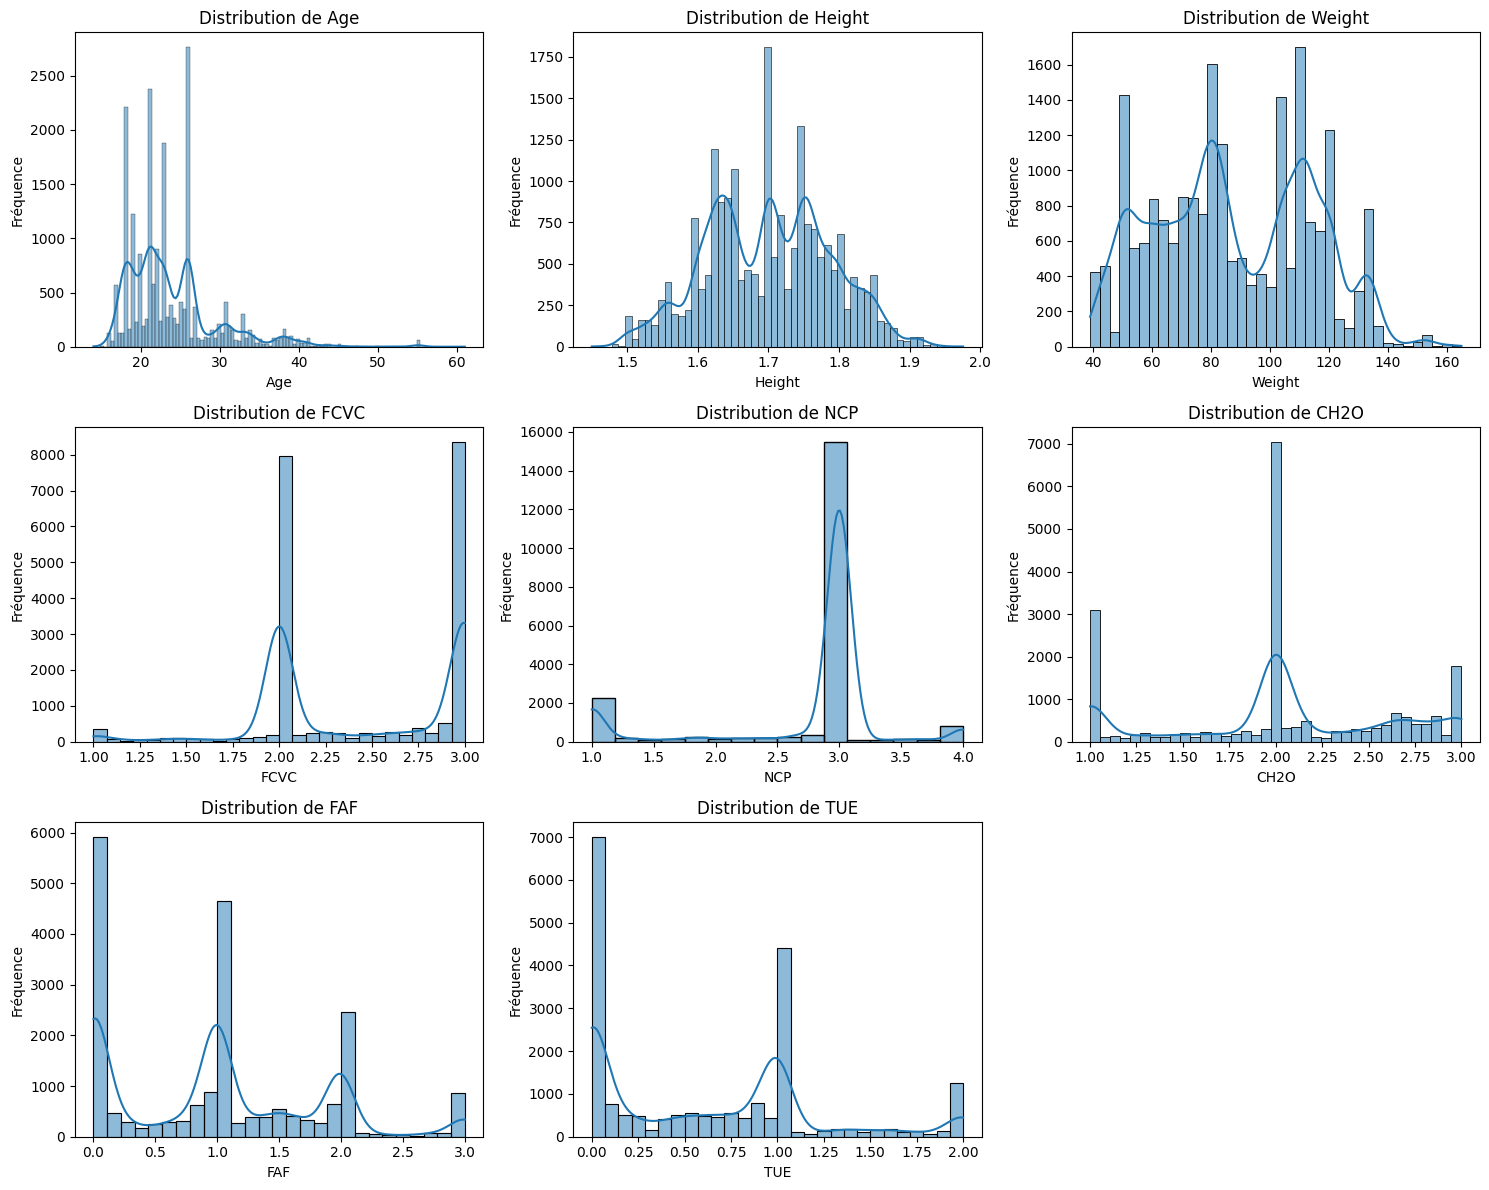

In [28]:
num_cols = train_set.select_dtypes(include=['int', 'float']).columns
num_plots = len(num_cols)
n_cols = 3
n_rows = num_plots // n_cols + (num_plots % n_cols > 0) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows)) 

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(train_set[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')

for j in range(i+1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Distribution of the Categorical Features

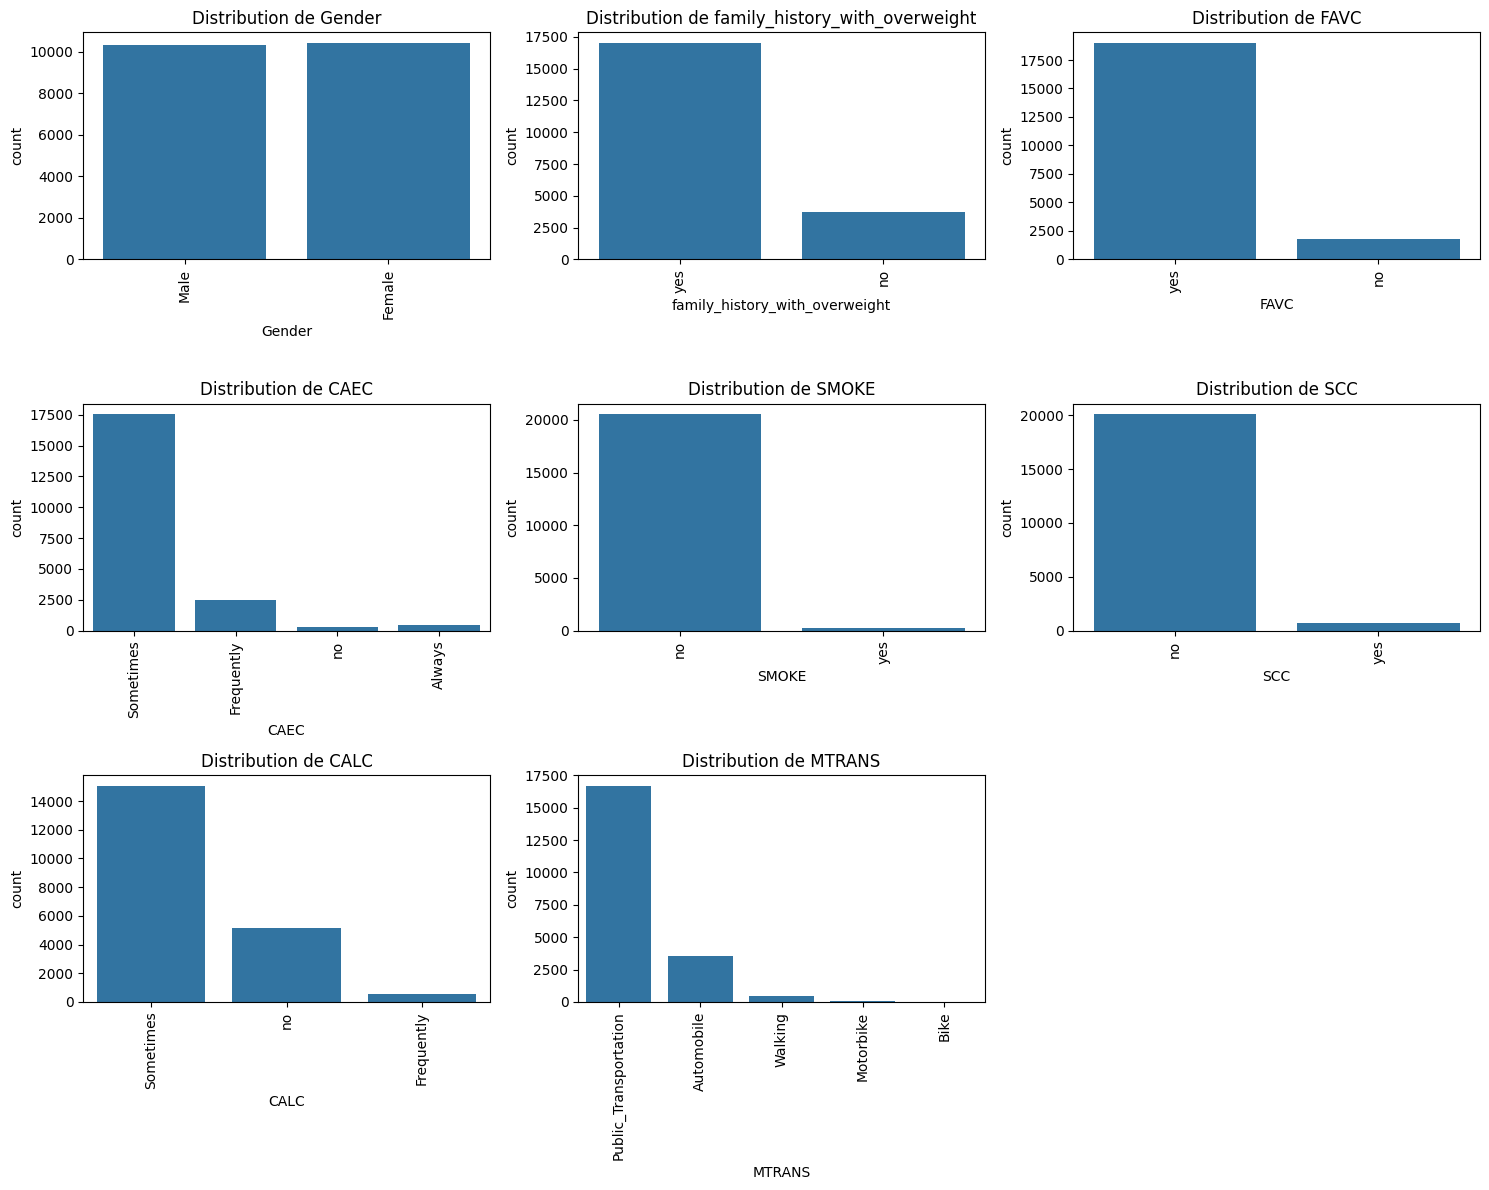

In [31]:
cat_cols = train_set.select_dtypes(include=['object', 'bool']).drop('NObeyesdad', axis=1).columns
num_plots = len(cat_cols)
n_cols = 3 
n_rows = num_plots // n_cols + (num_plots % n_cols > 0)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=train_set[col], ax=axes[i])
    axes[i].set_title(f'Distribution de {col}')
    axes[i].tick_params(axis='x', rotation=90) 

for j in range(i+1, n_rows * n_cols):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Target Analysis

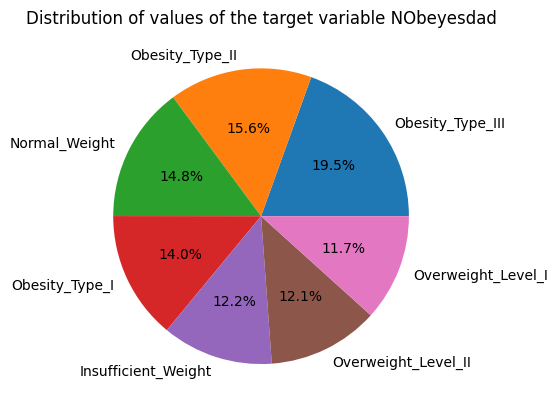

In [34]:
counts = train_set['NObeyesdad'].value_counts()

fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index, autopct='%1.1f%%')

ax.set_title('Distribution of values ​​of the target variable NObeyesdad')

plt.show()

## Data Preprocessing

### Categorical Variables

In [41]:
# Fetching categorical features
categorical_cols = train_set.select_dtypes(include=['object', 'bool']).columns
target = train_set['NObeyesdad']
categorical_data = train_set[categorical_cols].drop('NObeyesdad', axis=1)
pd.DataFrame(categorical_data).head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
id,,,,,,,,
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
1,Female,yes,yes,Frequently,no,no,no,Automobile
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation


In [42]:
encoded_categorical_data = pd.get_dummies(pd.DataFrame(categorical_data))
pd.DataFrame(encoded_categorical_data).head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
id,,,,,,,,,,,,,,,,,,,,,
0,False,True,False,True,False,True,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False
1,True,False,False,True,False,True,False,True,False,False,...,True,False,False,False,True,True,False,False,False,False
2,True,False,False,True,False,True,False,False,True,False,...,True,False,False,False,True,False,False,False,True,False
3,True,False,False,True,False,True,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False
4,False,True,False,True,False,True,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False


In [49]:
def cross_validation(model, X_train, y_train, n_folds=12):
    scoring = make_scorer(accuracy_score)
    scores = cross_val_score(model, X_train, y_train, cv=n_folds, scoring=scoring)
    mean_accuracy = np.mean(scores)
    print("Mean CV accuracy: ", mean_accuracy)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Supposons que X est l'ensemble des features et y la variable cible
clf = RandomForestClassifier()
clf.fit(encoded_categorical_data, target)

# Sélectionner les features basées sur l'importance calculée par le modèle
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(encoded_categorical_data)

# Identifier les features sélectionnées
selected_features = encoded_categorical_data.columns[(model.get_support())]

# Afficher les features les plus importantes
print(selected_features)

Index(['Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Public_Transportation'],
      dtype='object')


c:\Users\aubin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### Numerical Variables

In [43]:
numerical_cols = train_set.select_dtypes(include=['int64', 'float64']).columns
numerical_data = train_set[numerical_cols]
pd.DataFrame(numerical_data).head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
id,,,,,,,,
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721


In [44]:
dataset = pd.concat([numerical_data, encoded_categorical_data], axis=1)
pd.DataFrame(dataset).head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
id,,,,,,,,,,,,,,,,,,,,,
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,False,True,...,True,False,False,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,True,False,...,True,False,False,False,True,True,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,True,False,...,True,False,False,False,True,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,True,False,...,True,False,False,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,False,True,...,True,False,False,True,False,False,False,False,True,False


## Dimensionality Reduction

#### Principal Component Analysis

After One Hot Encoding, 22 components are necessary to maintain 100% variance (19 components for 95%)

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dataset)
scaled_dataset = scaler.transform(dataset)

pca = PCA(n_components=22)
pca_out = pca.fit(scaled_dataset)
pca_data = pca.transform(scaled_dataset)

pc_list = ["PC"+str(i) for i in list(range(1, pca_out.n_components+1))]
pc_load = ["loading "+str(i) for i in list(range(1, pca_out.n_components+1))]
cum_explained_var =np.cumsum(pca_out.explained_variance_ratio_)
df_pca=pd.DataFrame({'Variance Ratio':pca_out.explained_variance_ratio_
                     ,'Cumulated Variance Ratio':cum_explained_var
                    }, index=pc_list)
df_pca.T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
Variance Ratio,0.134584,0.097587,0.080003,0.070238,0.063661,0.061621,0.057095,0.048152,0.040748,0.037667,...,0.033343,0.032864,0.032025,0.028927,0.026112,0.025211,0.02285,0.015389,0.013252,0.008008
Cumulated Variance Ratio,0.134584,0.232171,0.312174,0.382413,0.446073,0.507695,0.564790,0.612941,0.653689,0.691356,...,0.795360,0.828224,0.860249,0.889176,0.915289,0.940500,0.96335,0.978739,0.991992,1.000000


#### Truncated SVD

In [46]:
# from sklearn.decomposition import TruncatedSVD

# scaler = StandardScaler()
# scaler.fit(dataset)
# scaled_dataset = scaler.transform(dataset)

# svd = TruncatedSVD(n_components=22, random_state=42) 

# svd_data = svd.fit_transform(scaled_dataset)

# svd_list = ["SVD"+str(i) for i in range(1, svd.n_components+1)]

# explained_variance_ratio = svd.explained_variance_ratio_
# cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# df_svd = pd.DataFrame({
#     'Variance Ratio': explained_variance_ratio,
#     'Cumulated Variance Ratio': cumulative_explained_variance
# }, index=svd_list)

# df_svd.T


## Evaluating

In [47]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# #1 Get matrix of data X
# train_X = train_set.drop(['NObeyesdad'], axis=1)

# #2 Get Y, the vector or value we predict
# y = train_set['NObeyesdad']
numerical_cols = dataset.columns

y = target

#3 Identify data types: numerical value / categoriccal Columns
# numerical_cols = train_X.select_dtypes(include=['int64', 'float64']).columns
# categorical_cols = train_X.select_dtypes(include=['object']).columns

#4 Replace missing numerical features by the median of the feature
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('pca', PCA(n_components=22)),             
    ('scaler', StandardScaler())])

#5 Encode categorical features using the "one hot" encoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#6 Create a preprocessor class used before doing predictions to apply transformations on the features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols)])


print(numerical_cols)
print(categorical_cols)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')
Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier


# List of models to try
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Support Vector Machine', SVC()),
    ('LGBM', LGBMClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Dictionary to store models and their scores for later use
model_scores = {}

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=42)

for name, model in models:
    # Create a new pipeline with the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Evaluate the model and print the score
    score = pipeline.score(X_test, y_test)
    print(f"{name} Accuracy: {score}")
    
    # Store the score in the dictionary
    model_scores[name] = score

ModuleNotFoundError: No module named 'lightgbm'